# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 033666

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [2]:
import pandas as pd
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset 
                 # In the file, attributes are separated by ,

In [3]:
dia_all.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


## Seperate the inpout (attributes) from target (label)

In [4]:
sourcevars = dia_all.iloc[:,:-1] #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

In [5]:
sourcevars.head()

,preg,plas,pres,skin,insu,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
targetvar.head()

,class
0,tested_positive
1,tested_negative
2,tested_positive
3,tested_negative
4,tested_positive


# Your answers
Please clearly highlight each task.

## Task 1.a Calculate the mean, median, standard-deviation and correlation matrix for all the input attributes

In [7]:
sourcevars.describe().loc[['mean', 'std', '50%']]

,preg,plas,pres,skin,insu,mass,pedi,age
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000


   In this table, median is represented by the row labelled 50%.

In [8]:
sourcevars.corr()

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
insu,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


## Task 1.b Draw one chart that should help with understanding the data

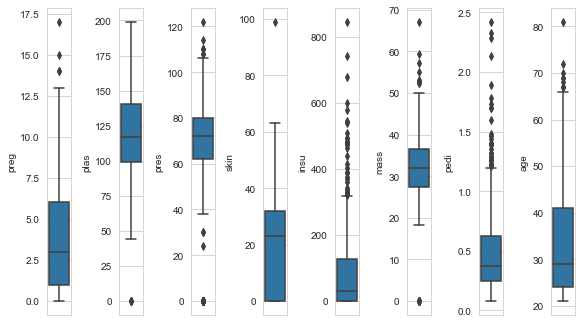

In [15]:
import matplotlib.pyplot as plt
import seaborn

labels = sourcevars.columns.values
cols, rows = sourcevars.shape[0], sourcevars.shape[1] 
plt.figure(figsize=(data_cols, 5 * data_rows))

# Create a subplot for each source var
for i in range(8):
    plt.subplot(rows + 1, cols, i + 1)
    seaborn.set_style('whitegrid')
    seaborn.boxplot(y=sourcevars[labels[i]], orient='v')
    plt.tight_layout()

*Figure 1: Boxplot of Source Variables*

The above chart shows that many columns contain outliers. It also provides a good indication of where the quartile boundaries lie, not to mention ranges.

You can see that there are also some strange occurences in the data. Mass, blood pressure, and plasma sugar have some zero values. This doesn't make any sense.

## Task 2.a Build a Decision Tree (DT) classifier using the training dataset and evaluate the performance on the “testing” set

In [17]:
import sklearn

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

model = tree.DecisionTreeClassifier()
tests = []

# Run 10 tests on the data
for _ in range(1, 11):
    X_train, X_test, Y_train, Y_test = train_test_split(sourcevars, targetvar, test_size=0.30)
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    
    # Use confusion matrix to calculate accuracy, sensitivity and precision
    tn, fp, fn, tp = confusion_matrix(Y_test, predicted).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    precision = tp / (tp + fp)
    
    tests.append([accuracy, sensitivity, precision])

# Output data
data = pd.DataFrame(tests, columns=['Accuracy', 'Sensitivity', 'Precision'])
data

,Accuracy,Sensitivity,Precision
0,0.623377,0.512500,0.460674
1,0.675325,0.512195,0.545455
2,0.727273,0.564103,0.602740
3,0.688312,0.602564,0.534091
4,0.623377,0.455696,0.450000
5,0.727273,0.623377,0.585366
6,0.722944,0.600000,0.600000
7,0.688312,0.537500,0.551282
8,0.722944,0.690476,0.604167
9,0.727273,0.641026,0.588235


In the table, True Positive Rate is shown by Sensitivity.

In [53]:
data.mean()

Accuracy       0.691342
Sensitivity    0.572442
Precision      0.581260
dtype: float64

## Task 2.b Compare the performance of the experiment above when you change the criterion from Gini impurity (“gini”) to information gain (“entropy”)

In [18]:
# Generate DT classifier with criterion set to entropy
ig_model = tree.DecisionTreeClassifier(criterion='entropy')

tests = []

# Run 10 tests on data
for _ in range(1, 11):
    X_train, X_test, Y_train, Y_test = train_test_split(sourcevars, targetvar, test_size=0.30)
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    
    tn, fp, fn, tp = confusion_matrix(Y_test, predicted).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn)
    precision = tp / (tp + fp)
    
    tests.append([accuracy, sensitivity, precision])

# Output data
data_ig = pd.DataFrame(tests, columns=['Accuracy_IG', 'Sensitivity_IG', 'Precision_IG'])
data_ig

,Accuracy_IG,Sensitivity_IG,Precision_IG
0,0.731602,0.684932,0.561798
1,0.688312,0.618421,0.522222
2,0.735931,0.614286,0.558442
3,0.709957,0.574713,0.625000
4,0.722944,0.587500,0.602564
5,0.692641,0.575000,0.554217
6,0.727273,0.560606,0.521127
7,0.740260,0.638554,0.638554
8,0.722944,0.575000,0.605263
9,0.696970,0.608108,0.523256


In [56]:
data_ig.mean()

Accuracy       0.702597
Sensitivity    0.591808
Precision      0.558739
dtype: float64

## Task 2.c Compare the performance of the two classifiers (a) and (b)

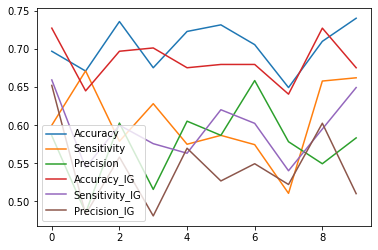

In [63]:
pd.concat([data, data_ig], axis=1, sort=False).plot()

The chart compares the two models using their respective tests, it can be seen that the accuracy, sensitivity, and precision scores don't vary much between classifiers. It is more likely that the variation is based on the training data in each test.

## Task 2.d Do you think standardizing the data before applying DT would improve the performance for this dataset

In task 1b, the diagram showed a number of outliers. Therefore the data would probably benefit from standardisation with Z-Score normalisation. This style of standardising will handle outliers better than Min-Max standardisation.

## Task 3.a How does increasing the minimum number of samples required to split an internal node parameter in the DT algorithm affect the accuracy on the test set?

In [20]:
data_test_min = []

# Test for each parameter value
for i in [2, 5, 10, 15]:
    # Generate classifier with min_samples_split set to value
    dt_min_split_model = tree.DecisionTreeClassifier(min_samples_split=i)
    
    tests = []
    
    # Run 10 tests
    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(sourcevars, targetvar, test_size=0.30)
        model.fit(X_train, Y_train)
        predicted = model.predict(X_test)
        
        # Calculate accuracy using confusion matrix
        tn, fp, fn, tp = confusion_matrix(Y_test, predicted).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        tests.append([accuracy])
    
    # Add test results to dataframe
    data_test_min.append(pd.DataFrame(tests, columns=['Accuracy ' + str(i)]))

# Create data
min_split_frame = pd.concat(data_test_min, axis=1, sort=False)

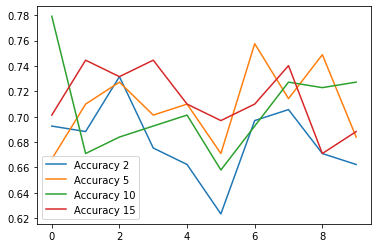

In [84]:
min_split_frame[['Accuracy 2', 'Accuracy 5', 'Accuracy 10', 'Accuracy 15']].plot()

Lower minimum number of samples seems to lead to a less accurate model, though this is difficult to see with our dataset. The only value that really shows this is Accuracy 2, which is consistently lower than the others. A larger dataset, or a standardised set, may show the difference more clearly.

## Task 3.b How does increasing the maximum depth of the decision tree parameter affect the accuracy on the test set

In [19]:
data_test_depth = []

# Test for each parameter value
for i in [3, 4, 5, 6]:
    # Generate classifier with max_depth set to value
    dt_min_split_model = tree.DecisionTreeClassifier(max_depth=i)
    
    tests = []
    
    # Run 10 tests
    for _ in range(10):
        X_train, X_test, Y_train, Y_test = train_test_split(sourcevars, targetvar, test_size=0.30)
        model.fit(X_train, Y_train)
        predicted = model.predict(X_test)
        
        # Calculate accuracy using confusion matrix
        tn, fp, fn, tp = confusion_matrix(Y_test, predicted).ravel()
        accuracy = (tp + tn) / (tp + tn + fp + fn)

        tests.append([accuracy])
    
    # Add test results to dataframe
    data_test_depth.append(pd.DataFrame(tests, columns=['Accuracy ' + str(i)]))

# Create data
max_depth_frame = pd.concat(data_test_depth, axis=1, sort=False)

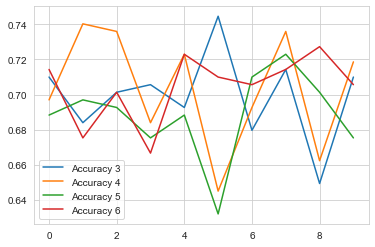

In [21]:
max_depth_frame[['Accuracy 3', 'Accuracy 4', 'Accuracy 5', 'Accuracy 6']].plot()

From the figure we can see that the accuracy score is most consistent with max depth of 6. Once again, there doesn't seem to be a clear correlation on our dataset. Testing with a larger dataset or a standardised dataset may give a more clear pattern.